# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.594  1  0.981 0.323 0.005   
                             age        0.113  1  0.187 0.666 0.001   
                             Kiel       2.320  1  3.831 0.052 0.020   
                             Magdeburg  5.087  1  8.400 0.004 0.042   
                             Sweden     8.863  1 14.636 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.078  1  0.073 0.787 0.000   
                             age        0.485  1  0.458 0.500 0.002   
                             Kiel       0.132  1  0.124 0.725 0.001   
                             Magdeburg  3.694  1  3.483 0.064 0.018   
                             Sweden    11.066  1 10.435 0.001 0.052   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.491  0.485    False  
                             age               0.176  0.782    False  
                             Kiel              1.286  0.124    False  
                             Magdeburg         2.378  0.016     True  
                             Sweden            3.753  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.104  0.870    False  
                             age               0.301  0.651    False  
                             Kiel              0.140  0.826    False  
                             Magdeburg         1.197  0.147    False  
                             Sweden            2.837  0.007     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.753  1  4.611 0.033 0.024   
                             age        0.034  1  0.211 0.647 0.001   
                             Kiel       0.519  1  3.181 0.076 0.016   
                             Magdeburg  0.945  1  5.787 0.017 0.029   
                             Sweden     2.487  1 15.228 0.000 0.074   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.533  1  0.739 0.391 0.004   
                             age        2.040  1  0.984 0.322 0.005   
                             Kiel      10.776  1  5.198 0.024 0.026   
                             Magdeburg 18.105  1  8.734 0.004 0.044   
                             Sweden     1.507  1  0.727 0.395 0.004   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.481  0.082    False  
                             age               0.189  0.756    False  
                             Kiel              1.119  0.160    False  
                             Magdeburg         1.767  0.048     True  
                             Sweden            3.879  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.408  0.539    False  
                             age               0.492  0.474    False  
                             Kiel              1.625  0.063    False  
                             Magdeburg         2.454  0.013     True  
                             Sweden            0.403  0.543    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.323         0.491  0.485    False   
                             age       0.666         0.176  0.782    False   
                             Kiel      0.052         1.286  0.124    False   
                             Magdeburg 0.004         2.378  0.016     True   
                             Sweden    0.000         3.753  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.787         0.104  0.870    False   
                             age       0.500         0.301  0.651    False   
                             Kiel      0.725         0.140  0.826    False   
                             Magdeburg 0.064         1.197  0.147    False   
                             Sweden    0.001         2.837  0.007     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.033         1.481  0.082    False  
                             age       0.647         0.189  0.756    False  
                             Kiel      0.076         1.119  0.160    False  
                             Magdeburg 0.017         1.767  0.048     True  
                             Sweden    0.000         3.879  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.391         0.408  0.539    False  
                             age       0.322         0.492  0.474    False  
                             Kiel      0.024         1.625  0.063    False  
                             Magdeburg 0.004         2.454  0.013     True  
                             Sweden    0.395         0.403  0.543    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.482     0.336     0.244         2.737     0.310
std       0.302         5.331     0.330     0.297         5.154     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.334     0.015     0.002         0.364     0.008
50%       0.119         0.925     0.238     0.092         1.034     0.185
75%       0.463         2.426     0.618     0.432         2.711     0.576
max       1.000       147.267     1.000     0.999        81.998     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.323         0.491   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.368   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.096         1.020   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.569         0.245   
A0A075B6H7                                         AD     0.132         0.878   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.027         1.574   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.813         0.090   
S4R3U6                                             AD     0.787         0.104   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.485    False   
A0A024R0T9;K7ER74;P02655                           AD      0.108    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.202    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.707    False   
A0A075B6H7                                         AD      0.257    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.075    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.888    False   
S4R3U6                                             AD      0.870    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.033         1.481   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.468   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.273         0.564   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.309         0.510   
A0A075B6H7                                         AD     0.031         1.506   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.031         1.502   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.673         0.172   
S4R3U6                                             AD     0.391         0.408   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.082    False  
A0A024R0T9;K7ER74;P02655                           AD      0.084    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.418    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.458    False  
A0A075B6H7                                         AD      0.078    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.409     0.335     0.245         1.489     0.318
std       0.290         1.629     0.316     0.287         1.771     0.312
min       0.000         0.000     0.000     0.000         0.002     0.000
25%       0.011         0.364     0.037     0.010         0.370     0.030
50%       0.122         0.913     0.243     0.108         0.967     0.210
75%       0.432         1.943     0.592     0.426         2.019     0.571
max       0.999        21.601     0.999     0.996        25.271     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1031,1002


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.323         0.491  0.485   
A0A024R0T9;K7ER74;P02655                           0.043         1.368  0.108   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.096         1.020  0.202   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.569         0.245  0.707   
A0A075B6H7                                         0.132         0.878  0.257   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.027         1.574  0.075   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.813         0.090  0.888   
S4R3U6                                             0.787         0.104  0.870   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.033   
A0A024R0T9;K7ER74;P02655                              False 0.034   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.273   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.309   
A0A075B6H7                                            False 0.031   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.031   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.673   
S4R3U6                                                False 0.391   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.481  0.082   
A0A024R0T9;K7ER74;P02655                                   1.468  0.084   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.564  0.418   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.510  0.458   
A0A075B6H7                                                 1.506  0.078   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.301   
Q9Y6X5                                                     1.502  0.079   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.172  0.776   
S4R3U6                                                     0.408  0.539   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    969
PI (yes) - QRILC (yes)   357
PI (no)  - QRILC (yes)    62
PI (yes) - QRILC (no)     33
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                               QRILC  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A075B6I0                   0.023         1.638  0.066    False 0.003   
A0A075B6J9                   0.071         1.149  0.160    False 0.012   
A0A087WWT2;Q9NPD7            0.053         1.274  0.127    False 0.005   
A0A087X1G7;A0A0B4J1S4;O60613 0.019         1.730  0.056    False 0.015   
A0A0B4J231;B9A064            0.023         1.640  0.066    False 0.001   
...                            ...           ...    ...      ...   ...   
Q9NYX4                       0.052         1.286  0.124    False 0.007   
Q9P0K9                       0.035         1.457  0.092    False 0.009   
Q9UNW1                       0.011         1.977  0.035     True 0.098   
Q9UP79                       0.772         0.112  0.860    False 0.016   
Q9UQ52                       0.046         1.341  0.113    False 0.006   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A075B6I0                           2.569  0.010     True       194  
A0A075B6J9                           1.939  0.035     True       156  
A0A087WWT2;Q9NPD7                    2.329  0.016     True       193  
A0A087X1G7;A0A0B4J1S4;O60613         1.823  0.043     True       184  
A0A0B4J231;B9A064                    3.071  0.004     True       196  
...                                    ...    ...      ...       ...  
Q9NYX4                               2.147  0.023     True       195  
Q9P0K9                               2.023  0.030     True       192  
Q9UNW1                               1.007  0.194    False       171  
Q9UP79                               1.804  0.045     True       135  
Q9UQ52                               2.253  0.019     True       188  

[95 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.485,0.082,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.108,0.084,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.202,0.418,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.707,0.458,196,PI (no) - QRILC (no)
A0A075B6H7,0.257,0.078,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.315,0.301,197,PI (no) - QRILC (no)
Q9Y6X5,0.075,0.079,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q9UP79,0.860,0.045,135,PI (no) - QRILC (yes),0.815
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3,0.786,0.034,69,PI (no) - QRILC (yes),0.751
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.700,0.019,86,PI (no) - QRILC (yes),0.681
Q9H492;Q9H492-2,0.519,0.000,104,PI (no) - QRILC (yes),0.519
J3KSJ8;Q9UD71;Q9UD71-2,0.486,0.010,51,PI (no) - QRILC (yes),0.476
...,...,...,...,...,...
Q92542;Q92542-2,0.058,0.049,193,PI (no) - QRILC (yes),0.010
Q93063;Q93063-3,0.058,0.050,145,PI (no) - QRILC (yes),0.008
Q16706,0.053,0.047,195,PI (no) - QRILC (yes),0.006


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


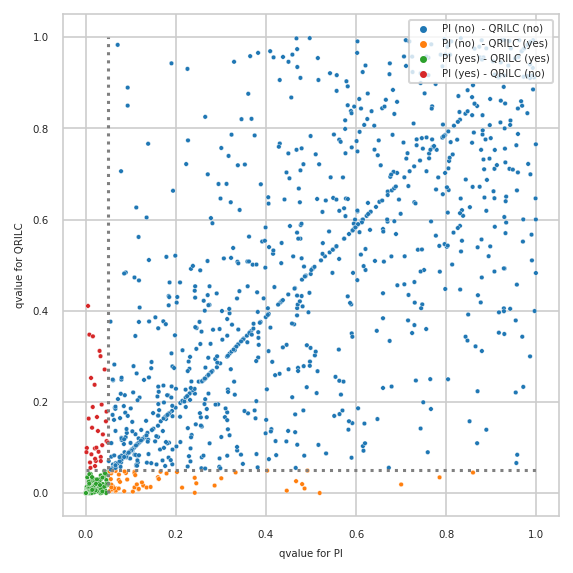

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


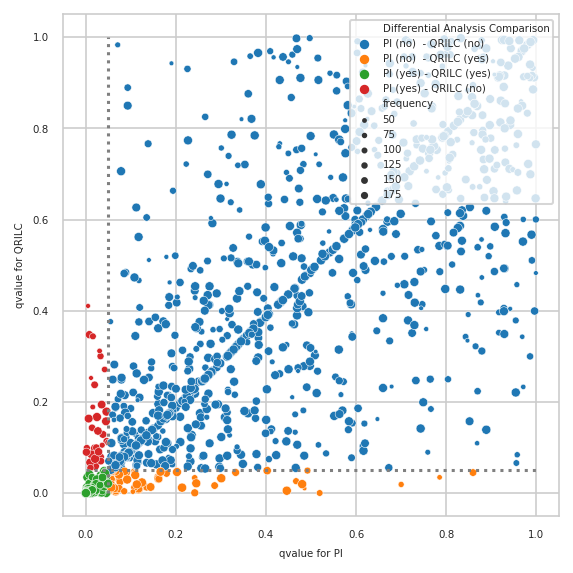

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out